In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# S3.3
# Alle Intervalle sollen as zweidimensionale Vektoren dargestellt werden

In [3]:
def interval_hull(x):
    return np.array([x.min(),x.max()])

In [4]:
def interval_add(x,y):
    return np.array([x.min() + y.min(), x.max() + y.max()])

In [5]:
def interval_subtract(x,y):
    return np.array([x.min() - y.max(), x.max() - y.min()])

In [6]:
def interval_multiply(x,y):
    a = x.min() * y.min()
    b = x.min() * y.max()
    c = x.max() * y.min()
    d = x.max() * y.max()
    e = np.array([a,b,c,d])
    return interval_hull(e) 

In [7]:
def boxweite(x):
    return np.linalg.norm(x.max() - x.min())

In [8]:
def boxmittelpunkt(x):
    return (x.min() + x.max())/2

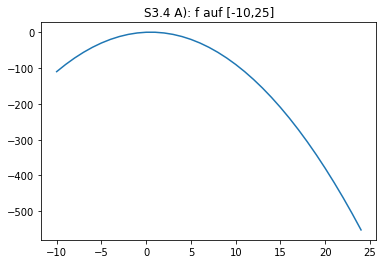

In [9]:
# S3.4
# a) Plotten f auf X = [-10, 25]
interval = range(-10,25)
f = list(map(lambda x: x - x**2, interval))
plt.title('S3.4 A): f auf [-10,25]')
plt.plot(interval,f)
plt.show()

In [10]:
# b) Implementieren die intervallwertigen Funktionnen F1, F2 und F3
X = np.array([-10,25])
def F1(x):
    return interval_subtract(x,interval_multiply(x,x))
F1(X)

array([-635,  275])

In [12]:
def F2(x):
    return interval_multiply(x,interval_subtract(np.array([1,1]),x))
F2(X)

array([-600,  275])

In [16]:
def F3(x):
    if x.min() <= 0.5 and x.max() <= 0.5:
        return np.array([ x.min()*(1 - x.min()), x.max()*(1 - x.max()) ])
    if x.min() <= 0.5 and x.max()  > 0.5:
        return np.array([ min(x.min()*(1 - x.min()), x.max()*(1 - x.max())), 0.25 ])
    if x.min() >  0.5 and x.max()  > 0.5:
        return np.array([ x.max()*(1 - x.max()), x.min()*(1 - x.min()) ])
F3(X)

array([-6.0e+02,  2.5e-01])

<function matplotlib.pyplot.show(*args, **kw)>

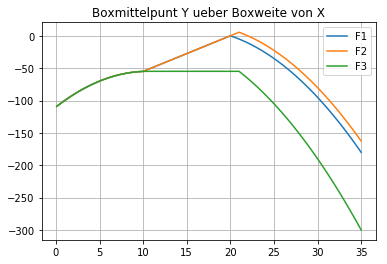

In [31]:
# c)
# erstellen List e von 0.1 nach 35, Schrittweite 0.1
e = np.arange(0.1,35.1,0.1)
f1_mittelpunkt = []
f2_mittelpunkt = []
f3_mittelpunkt = []
f1_boxweite = []
f2_boxweite = []
f3_boxweite = []
x_boxweite  = []
for i in range(0,len(e)):
    y = np.array([-10,-10+e[i]])
    x_boxweite.append(boxweite(y))
    f1_mittelpunkt.append(boxmittelpunkt(F1(y)))
    f2_mittelpunkt.append(boxmittelpunkt(F2(y)))
    f3_mittelpunkt.append(boxmittelpunkt(F3(y)))
    f1_boxweite.append(boxweite(F1(y)))
    f2_boxweite.append(boxweite(F2(y)))
    f3_boxweite.append(boxweite(F3(y)))

fig,ax = plt.subplots()
ax.plot(x_boxweite,f1_mittelpunkt,label='F1')
ax.plot(x_boxweite,f2_mittelpunkt,label='F2')
ax.plot(x_boxweite,f3_mittelpunkt,label='F3')
plt.title('Boxmittelpunt der Y ueber Boxweite von X')
plt.legend(loc='best')
plt.grid(True)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

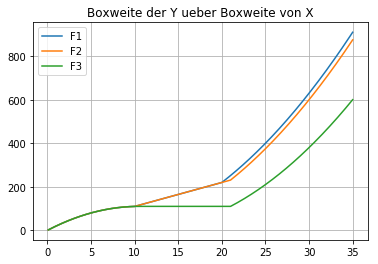

In [35]:
fig,ax = plt.subplots()
ax.plot(x_boxweite,f1_boxweite,label='F1')
ax.plot(x_boxweite,f2_boxweite,label='F2')
ax.plot(x_boxweite,f3_boxweite,label='F3')
plt.title('Boxweite der Y ueber Boxweite von X')
plt.legend(loc='best')
plt.grid(True)
plt.show